In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv("./data/19zpallnoagi.csv")
df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,A01700,SCHF,N02300,A02300,N02500,A02500,N26270,A26270,N02900,A02900,N03220,A03220,N03300,A03300,N03270,A03270,N03150,A03150,N03210,A03210,N04450,A04450,N04100,A04100,N04200,A04200,N04470,A04470,A00101,N17000,A17000,N18425,A18425,N18450,A18450,N18500,A18500,N18800,A18800,N18460,A18460,N18300,A18300,N19300,A19300,N19500,A19500,N19530,A19530,N19570,A19570,N19700,A19700,N20950,A20950,N04475,A04475,N04800,A04800,N05800,A05800,N09600,A09600,N05780,A05780,N07100,A07100,N07300,A07300,N07180,A07180,N07230,A07230,N07240,A07240,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,0,2100740.00,914850.00,743250.00,395440.00,1925700.00,75480.00,1116020.00,1434160.00,4085710.00,31000.00,22690.00,8310.00,4490.00,414360.00,511240.00,130815070.00,2100670.00,132129733.00,1760950.00,91213539.00,552680.00,1100308.00,268270.00,2122402.00,245060.00,1609924.00,76450.00,90443.00,359160.00,3374570.00,231930.00,4881146.00,186930.00,3420409.00,424560.00,11155464.00,38620.00,34990.00,107337.00,327590.00,4991389.00,86660.00,7018482.00,463380.00,1314663.00,43800.00,11260.00,4400.00,116134.00,34650.00,275100.00,19590.00,93986.00,139600.00,155085.00,1931320.00,33805170.00,1931270.00,33154524.00,327750.00,647390.00,166360.00,5909478.00,34290184.00,45810.00,654479.00,133920.00,1214226.00,23680.00,42843.00,136710.00,335791.00,110740.00,46929.00,159670.00,1006379.00,164780.00,1045271.00,122240.00,1294464.00,720.00,5859.00,5110.00,2848.00,5900.00,64815.00,147810.00,2343223.00,7070.00,127247.00,229930.00,1509419.00,1617000.00,91874439.00,1615690.00,15030269.00,380.00,4636.00,34500.00,37929.00,797610.00,1482959.00,69820.00,65687.00,95670.00,55005.00,119770.00,128328.00,154010.00,29858.00,576980.00,1089134.00,23690.00,26485.00,253170.00,695726.00,78910.00,672888.00,85930.00,731410.00,2007350.00,17896016.00,486090.00,1348466.00,443720.00,1209646.00,356250.00,621805.00,116190.00,105274.00,23950.00,17716.00,1329580.00,13520654.00,1469630.00,14554116.00,30540.00,50703.00,39520.00,141384.00,418210.00,1875183.00,1633620.00,5232476.00,1603620.00,4711318.00,32340.00,463956.00
1,1,AL,35004,0,5330.00,2310.00,2060.00,840.00,4910.00,200.00,2440.00,3740.00,10360.00,30.00,30.00,0.00,0.00,990.00,1230.00,315055.00,5330.00,317526.00,4620.00,259009.00,1360.00,1408.00,580.00,1410.00,510.00,986.00,250.00,263.00,750.00,5915.00,460.00,3056.00,490.00,7078.00,960.00,21538.00,0.00,70.00,267.00,800.00,11021.00,140.00,4915.00,1270.00,2471.00,130.00,32.00,0.00,0.00,50.00,367.00,60.00,207.00,590.00,695.00,4950.00,88349.00,4950.00,86718.00,840.00,1632.00,400.00,10517.00,44806.00,120.00,1606.00,340.00,1783.00,40.00,68.00,330.00,378.00,280.00,90.00,380.00,2038.00,390.00,2067.00,320.00,2382.00,0.00,0.00,0.00,0.00,0.00,0.00,350.00,3875.00,0.00,0.00,510.00,1961.00,4380.00,219380.00,4390.00,30230.00,0.00,0.00,120.00,148.00,2030.00,4335.00,90.00,5.00,410.00,244.00,300.00,334.00,370.00,67.00,1590.00,3533.00,60.00,69.00,520.00,1177.00,190.00,1870.00,220.00,2051.00,5130.00,35790.00,820.00,1925.00,710.00,1691.00,650.00,1112.00,240.00,197.00,50.00,40.00,3850.00,25896.00,4090.00,27425.00,30.00,18.00,20.00,30.00,1120.00,2718.00,4120.00,11050.00,4060.00,10414.00,70.00,320.00
2,1,AL,35005,0,3280.00,1520.00,800.00,900.00,2980.00,120.00,1670.00,2470.00,6060.00,40.00,40.00,0.00,0.00,920.00,750.00,133950.00,3280.00,134803.00,2800.00,109801.00,460.00,417.00,150.00,217.00,130.00,149.00,140.00,117.00,520.00,81.00,100.00,173.00,230.00,3112.00,610.00,13464.00,0.00,50.00,148.00,470.00,5354.00,30.00,279.00,540.00,853.00,50.00,13.00,0.00,0.00,0.00,0

In [3]:
df.shape

(27695, 152)

since we are pay attention to income, im going use just STATE, ZIPCODE, A00100(Adjust gross income (AGI)), N02650(Number of returns with total income) and A02650(Total income amount) columns. also we removed zipcode 00000 and 99999 rows. because zipcode 00000 means that aggregations for that state (sum) and 99999 means, from the source: "ZIP codes with less than 100 returns and those identified as a single building or nonresidential ZIP code were categorized as “other” (99999)." -- TODO: continue *******

In [4]:
df_income = df[(df["ZIPCODE"]!=0) & (df["ZIPCODE"]!=99999)].iloc[:,list(range(1, 3)) + list(range(19, 22))]
df_income.rename(columns={"A00100": "ADJUSTED_GROSS_INCOME", "N02650": "TOTAL_INCOME_RETURN", "A02650": "TOTAL_INCOME_AMOUNT"}, inplace=True)
df_income.head()

,STATE,ZIPCODE,ADJUSTED_GROSS_INCOME,TOTAL_INCOME_RETURN,TOTAL_INCOME_AMOUNT
1,AL,35004,315055.00,5330.00,317526.00
2,AL,35005,133950.00,3280.00,134803.00
3,AL,35006,67289.00,1230.00,67693.00
4,AL,35007,756173.00,12380.00,763960.00
5,AL,35010,459471.00,8090.00,463806.00


In [5]:
df_income["MEAN_TOTAL_INCOME"] = df_income["TOTAL_INCOME_AMOUNT"] / df_income["TOTAL_INCOME_RETURN"]
df_income.describe().T

,count,mean,std,min,25%,50%,75%,max
ZIPCODE,27593.00,48856.24,27047.66,1001.00,27105.00,48845.00,70578.00,99901.00
ADJUSTED_GROSS_INCOME,27593.00,428488.35,723203.13,1306.00,32745.00,118192.00,533730.00,12229642.00
TOTAL_INCOME_RETURN,27593.00,5510.11,7310.86,90.00,600.00,1990.00,8020.00,59000.00
TOTAL_INCOME_AMOUNT,27593.00,433438.17,731859.73,1306.00,33118.00,119539.00,539463.00,12331790.00
MEAN_TOTAL_INCOME,27593.00,69.83,55.67,12.70,48.23,57.57,72.88,3296.83


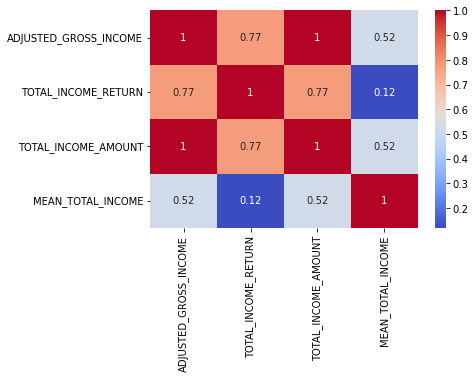

In [6]:
sns.heatmap(df_income.iloc[:,2:].corr(), cmap="coolwarm", annot=True);

since ADJUSTED_GROSS_INCOME and TOTAL_INCOME_AMOUNT highly correlated we can use one of them or apply pca and transform into one feature or maybe averaging two of them into one feature. im gonna just drop ADJUSTED_GROSS_INCOME column.

In [7]:
df_income.drop(columns="ADJUSTED_GROSS_INCOME", inplace=True)
df_income.head()

,STATE,ZIPCODE,TOTAL_INCOME_RETURN,TOTAL_INCOME_AMOUNT,MEAN_TOTAL_INCOME
1,AL,35004,5330.00,317526.00,59.57
2,AL,35005,3280.00,134803.00,41.10
3,AL,35006,1230.00,67693.00,55.03
4,AL,35007,12380.00,763960.00,61.71
5,AL,35010,8090.00,463806.00,57.33


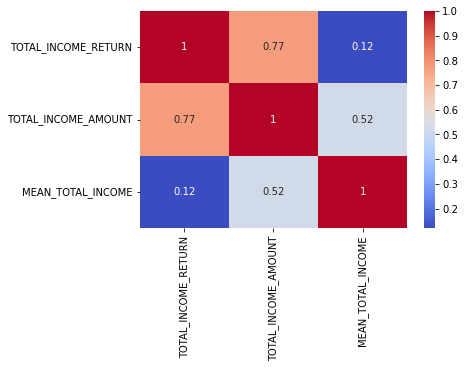

In [8]:
sns.heatmap(df_income.iloc[:,2:].corr(), cmap="coolwarm", annot=True);


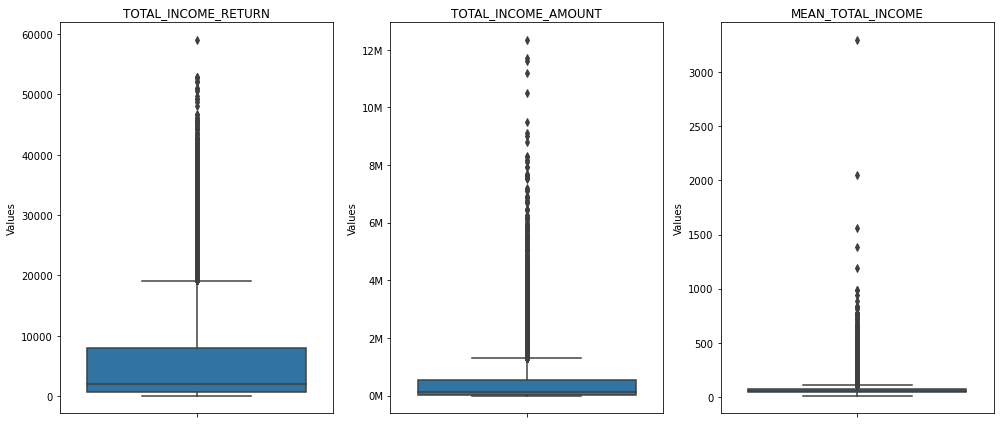

In [16]:
columns_to_plot = ['TOTAL_INCOME_RETURN', 'TOTAL_INCOME_AMOUNT', 'MEAN_TOTAL_INCOME']

# Create subplots in a grid for the specified columns
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

# Plot each column's boxplot in a separate subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=df_income[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

    # Check if the maximum value in the column is greater than or equal to 1e7 (10 million)
    if df_income[column].max() >= 1e7:
        axes[i].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))  # Format in millions

plt.tight_layout()
plt.show()

c:\Users\Furka\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\Furka\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\Furka\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


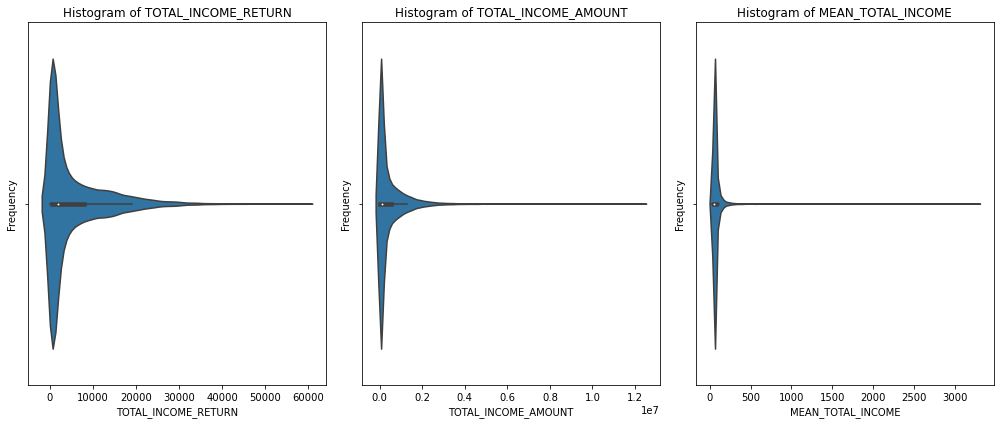

In [19]:

# Create subplots in a grid
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    sns.violinplot(df_income[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

since the data does not follow normal distribution we should use min-max normalization for modelling

we just need income related columns for modelling so we use them.

In [20]:
df_model = df_income.loc[:, columns_to_plot]
df_model.head()

,TOTAL_INCOME_RETURN,TOTAL_INCOME_AMOUNT,MEAN_TOTAL_INCOME
1,5330.00,317526.00,59.57
2,3280.00,134803.00,41.10
3,1230.00,67693.00,55.03
4,12380.00,763960.00,61.71
5,8090.00,463806.00,57.33


In [41]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_model)

In [77]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

k_means_model = KMeans(n_clusters=3)
k_means_model.fit(df_scaled)
cluster_labels = k_means_model.predict(df_scaled)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
df_model["Cluster"] = cluster_labels

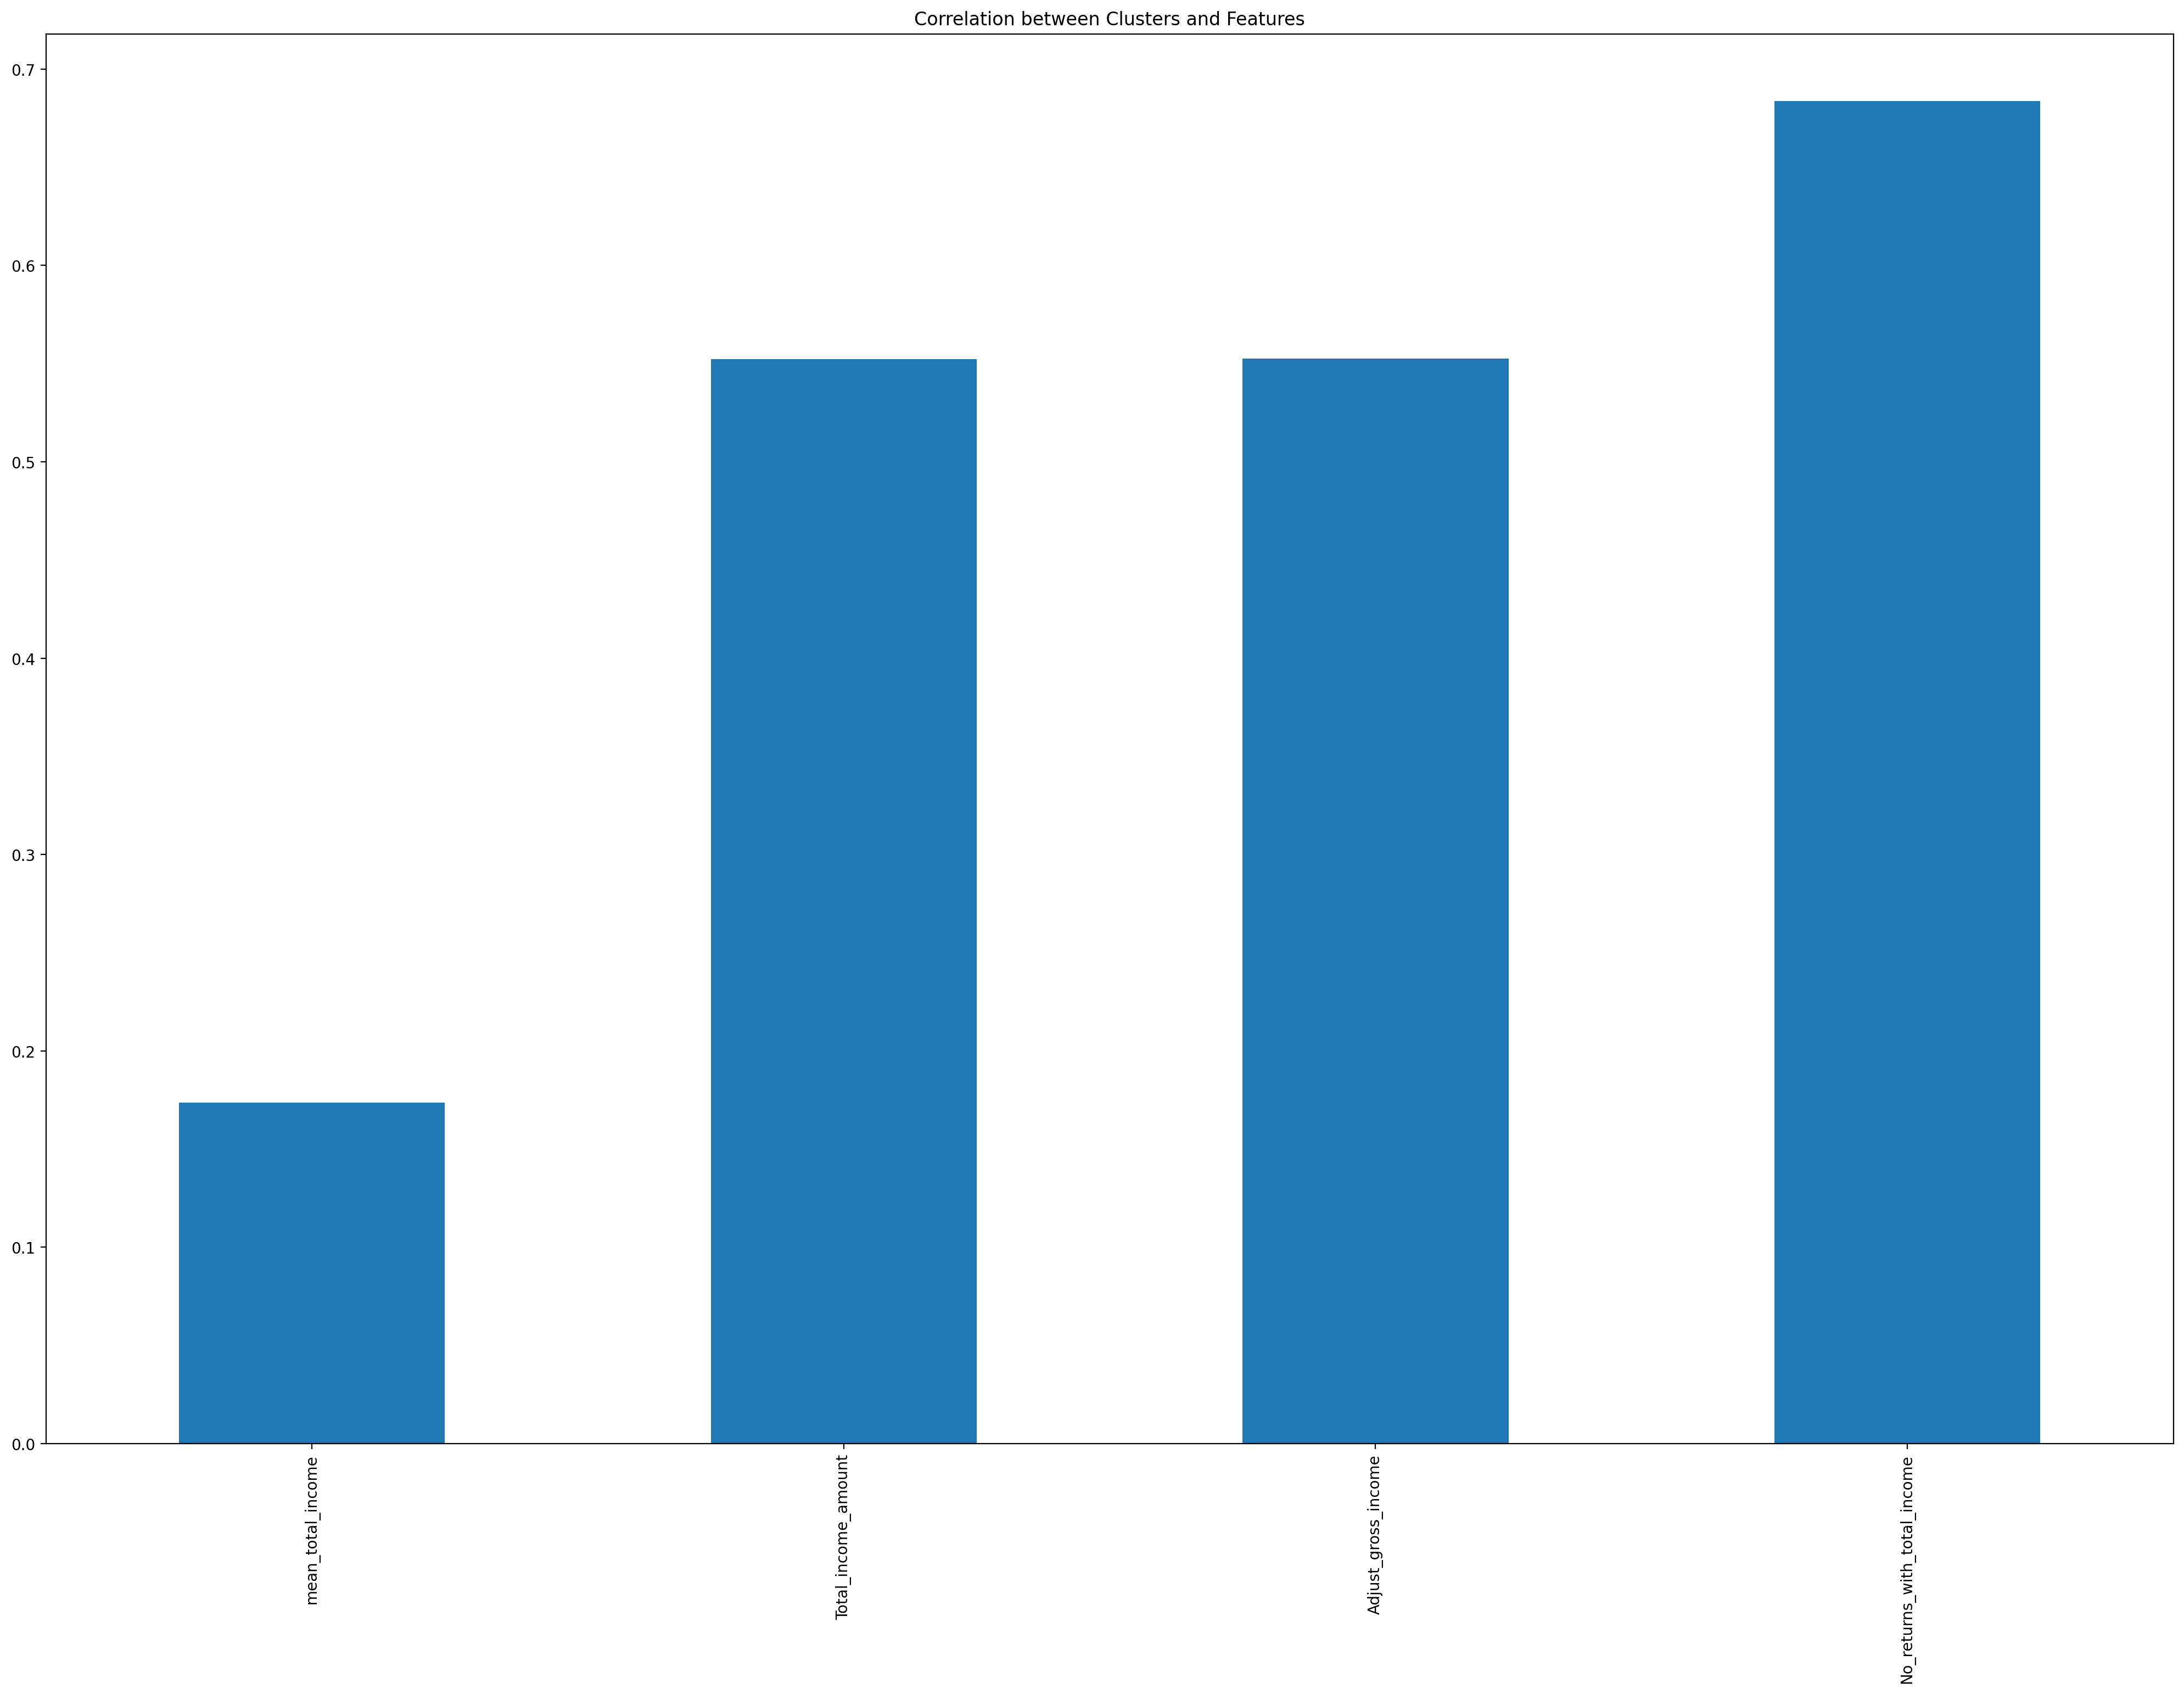

In [85]:
plt.figure(figsize=(25,17),dpi=200)
df_model.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

In [81]:
ssd = []

for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    
    ssd.append(model.inertia_)

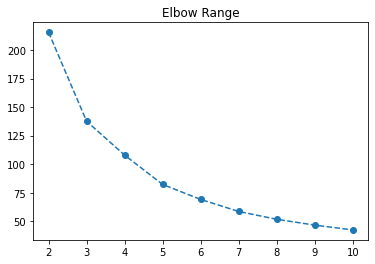

In [83]:
plt.plot(range(2,11),ssd,"o--")
plt.title("Elbow Range")
plt.show()

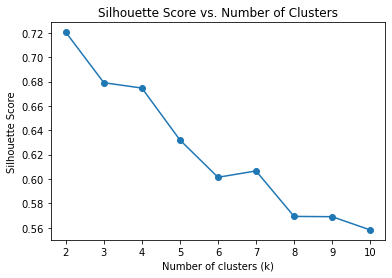

In [84]:
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [89]:
df_model.head()

,Adjust_gross_income,No_returns_with_total_income,Total_income_amount,mean_total_income,Cluster
1,315055.00,5330.00,317526.00,59.57,0
2,133950.00,3280.00,134803.00,41.10,0
3,67289.00,1230.00,67693.00,55.03,0
4,756173.00,12380.00,763960.00,61.71,2
5,459471.00,8090.00,463806.00,57.33,2


In [92]:
df_income.head()

,STATE,ZIPCODE,Adjust_gross_income,No_returns_with_total_income,Total_income_amount,mean_total_income
1,AL,35004,315055.00,5330.00,317526.00,59.57
2,AL,35005,133950.00,3280.00,134803.00,41.10
3,AL,35006,67289.00,1230.00,67693.00,55.03
4,AL,35007,756173.00,12380.00,763960.00,61.71
5,AL,35010,459471.00,8090.00,463806.00,57.33


In [94]:
df_cluster = df_income.copy()
df_cluster["cluster"] = cluster_labels
df_cluster.head()

,STATE,ZIPCODE,Adjust_gross_income,No_returns_with_total_income,Total_income_amount,mean_total_income,cluster
1,AL,35004,315055.00,5330.00,317526.00,59.57,0
2,AL,35005,133950.00,3280.00,134803.00,41.10,0
3,AL,35006,67289.00,1230.00,67693.00,55.03,0
4,AL,35007,756173.00,12380.00,763960.00,61.71,2
5,AL,35010,459471.00,8090.00,463806.00,57.33,2


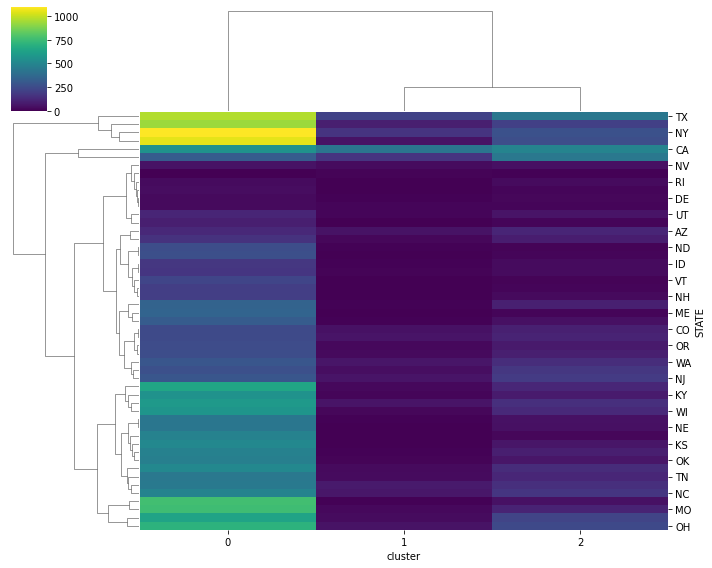

In [96]:
agg_data = df_cluster.groupby(['STATE', 'cluster']).size().unstack(fill_value=0)

# Create a clustermap
sns.clustermap(agg_data, cmap='viridis', figsize=(10, 8))

c:\Users\Furka\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1440x648 with 0 Axes>

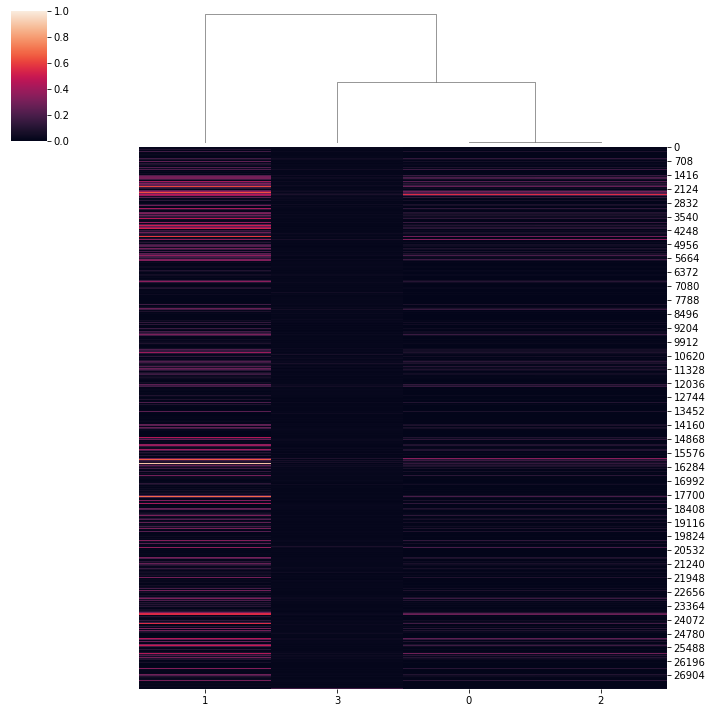

In [91]:
plt.figure(figsize=(20,9))
sns.clustermap(df_scaled,row_cluster=False)
plt.show()

In [ ]:
df_deduction = df_income.A02650 - df_income.A00100
df_deduction.describe()

count    27593.00
mean      4949.81
std       9070.21
min      -2518.00
25%        334.00
50%       1306.00
75%       5660.00
max     171804.00
dtype: float64

In [ ]:
df_deduction[df_deduction == df_deduction.max()].index


Int64Index([15940], dtype='int64')

In [ ]:
df_income[df_income.index == 15940]

,STATE,ZIPCODE,A00100,N02650,A02650
15940,NY,10024,10339889.00,28830.00,10511693.00


In [ ]:
df_deduction[df_deduction < 0].index

Int64Index([18356, 20666], dtype='int64')

In [ ]:
df_income[df_income.index.isin([20666, 18356])]


,STATE,ZIPCODE,A00100,N02650,A02650
18356,ND,58565,9718.00,130.00,9443.00
20666,PA,15901,30835.00,1270.00,28317.00


In [ ]:
(df_income[df_income["mean_total_income"]==df_income["mean_total_income"].max()].index)

Int64Index([4040], dtype='int64')

In [ ]:
df_income[df_income.index == 4040]


,STATE,ZIPCODE,Adjust_gross_income,No_returns_with_total_income,Total_income_amount,mean_total_income
4040,FL,33109,887345.00,270.00,890144.00,3296.83
